In [3]:
# plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# data analysis libraries
import pandas as pd
import numpy as np

# general imports
from pathlib import Path

### Load the data from the experiments

In [133]:
folder = Path("storage/synced")

# load all csv files in the folder using pandas
df = pd.concat([pd.read_csv(f) for f in folder.glob("*.csv")])
df["stride_series"].replace(np.NaN, False, inplace=True)
df['train_exc_limit'].replace(np.NaN, 0, inplace=True)
df["pretrained"].replace(np.NaN, False, inplace=True)
df["pretrain_mode"].replace(np.NaN, False, inplace=True)
df["window_time_stride"].replace(np.NaN, 1, inplace=True)
df["window_patt_stride"].replace(np.NaN, 1, inplace=True)
df["cv_rep"].replace(np.NaN, False, inplace=True)
df["eq_wdw_length"] = df["window_length"]*df["window_time_stride"]
df

,mode,arch,dataset,val_size,max_epochs,batch_size,pretrain_mode,window_length,window_time_stride,window_patt_stride,...,nevents_test,nevents_train_lim,nevents_train_tot,time_dm,time_train,time_total,stride_series,val_mse,val_r2,eq_wdw_length
0,gf,tcn,CBF,0.25,120.0,128.0,False,10,1.0,1.0,...,200.0,384.0,384.0,4.607042,5728.039945,5732.646986,False,NaN,NaN,10.0
1,gf,tcn,CBF,0.25,120.0,128.0,False,10,3.0,1.0,...,200.0,384.0,384.0,5.990171,8124.125713,8130.115884,False,NaN,NaN,30.0
2,gf,tcn,CBF,0.25,120.0,128.0,False,10,5.0,1.0,...,200.0,384.0,384.0,7.273125,8198.627041,8205.900166,False,NaN,NaN,50.0
3,gf,tcn,CBF,0.25,120.0,128.0,False,10,7.0,1.0,...,200.0,384.0,384.0,5.965159,8139.845265,8145.810424,False,NaN,NaN,70.0
4,gf,tcn,CBF,0.25,120.0,128.0,False,10,7.0,1.0,...,48.0,48.0,384.0,4.739391,303.790380,308.529771,True,NaN,NaN,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,df,res,SyntheticControl,0.25,120.0,128.0,False,10,7.0,1.0,...,200.0,384.0,768.0,27.572046,11111.906313,11139.478359,True,NaN,NaN,70.0
11,df,res,SyntheticControl,0.25,120.0,128.0,False,10,7.0,1.0,...,200.0,384.0,768.0,18.857238,15301.487796,15320.345035,False,NaN,NaN,70.0
12,df,res,SyntheticControl,0.25,120.0,128.0,False,10,7.0,1.0,...,200.0,384.0,768.0,20.399303,18484.149174,18504.548477,False,NaN,NaN,70.0
13,df,res,SyntheticControl,0.25,120.0,128.0,False,10,7.0,1.0,...,200.0,768.0,768.0,21.944322,19017.388270,19039.332592,False,NaN,NaN,70.0


In [134]:
df[df["arch"] == "nn"][['mode', 'arch', 'dataset', 'pretrain_mode', 'window_length', "stride_series",
                 'window_time_stride', 'window_patt_stride', 'train_exc_limit', 'pretrained', "cv_rep"]]

,mode,arch,dataset,pretrain_mode,window_length,stride_series,window_time_stride,window_patt_stride,train_exc_limit,pretrained,cv_rep
0,ts,nn,GunPoint,False,150,False,1.0,1.0,32.0,False,3.0
0,ts,nn,ECG200,False,96,False,1.0,1.0,32.0,False,0.0
0,ts,nn,ECG200,False,96,False,1.0,1.0,32.0,False,2.0
0,ts,nn,SyntheticControl,False,60,False,1.0,1.0,32.0,False,3.0
0,ts,nn,SyntheticControl,False,60,False,1.0,1.0,32.0,False,2.0
0,ts,nn,ArrowHead,False,251,False,1.0,1.0,32.0,False,2.0
0,ts,nn,Trace,False,275,False,1.0,1.0,32.0,False,2.0
0,ts,nn,ArrowHead,False,251,False,1.0,1.0,32.0,False,0.0
0,ts,nn,ArrowHead,False,251,False,1.0,1.0,32.0,False,4.0
0,ts,nn,CBF,False,128,False,1.0,1.0,32.0,False,0.0


In [135]:
# check for duplicate entries
file_entries = len(df)
df = df.groupby(['mode', 'arch', 'dataset', 'pretrain_mode', 'window_length', "stride_series",
                 'window_time_stride', 'window_patt_stride', 'train_exc_limit', 'pretrained', "cv_rep"]).first().reset_index()
unique_entries = len(df)
print(f"{file_entries - unique_entries} duplicate entries removed")
# df = df.groupby(['mode', 'arch', 'dataset', 'pretrain_mode', 'window_length', "stride_series",
#                  'window_time_stride', 'window_patt_stride', 'train_exc_limit', 'pretrained', "cv_rep"]).count()
# df[df["eq_wdw_length"] > 1]

0 duplicate entries removed


In [136]:
# show pretrained encoders
df[df["pretrain_mode"]==True].groupby(['dataset', 'mode', 'arch', "stride_series"])[[]].first()

Empty DataFrame
Columns: []
Index: [(ArrowHead, df, cnn, False), (ArrowHead, df, cnn, True), (ArrowHead, df, res, False), (ArrowHead, df, res, True), (ArrowHead, gf, cnn, False), (ArrowHead, gf, cnn, True), (ArrowHead, gf, res, False), (ArrowHead, gf, res, True), (CBF, df, cnn, False), (CBF, df, cnn, True), (CBF, df, res, False), (CBF, df, res, True), (CBF, df, tcn, False), (CBF, df, tcn, True), (CBF, gf, cnn, False), (CBF, gf, cnn, True), (CBF, gf, res, False), (CBF, gf, res, True), (CBF, gf, tcn, False), (CBF, gf, tcn, True), (ECG200, df, cnn, False), (ECG200, df, cnn, True), (ECG200, df, res, False), (ECG200, df, res, True), (ECG200, gf, cnn, False), (ECG200, gf, cnn, True), (ECG200, gf, res, False), (ECG200, gf, res, True), (GunPoint, df, cnn, False), (GunPoint, df, cnn, True), (GunPoint, df, res, False), (GunPoint, df, res, True), (GunPoint, gf, cnn, False), (GunPoint, gf, cnn, True), (GunPoint, gf, res, False), (GunPoint, gf, res, True), (Plane, df, cnn, False), (Plane, df, cnn, True), (Plane, df, res, False), (Plane, df, res, True), (Plane, gf, cnn, False), (Plane, gf, cnn, True), (Plane, gf, res, False), (Plane, gf, res, True), (SyntheticControl, df, cnn, False), (SyntheticControl, df, cnn, True), (SyntheticControl, df, res, False), (SyntheticControl, df, res, True), (SyntheticControl, gf, cnn, False), (SyntheticControl, gf, cnn, True), (SyntheticControl, gf, res, False), (SyntheticControl, gf, res, True), (Trace, df, cnn, False), (Trace, df, cnn, True), (Trace, df, res, False), (Trace, df, res, True), (Trace, gf, cnn, False), (Trace, gf, cnn, True)]

In [137]:
cols = ['test_acc', 'test_f1', 'test_auroc', 'val_acc', 'val_f1', 'val_auroc']
df.columns

Index(['mode', 'arch', 'dataset', 'pretrain_mode', 'window_length',
       'stride_series', 'window_time_stride', 'window_patt_stride',
       'train_exc_limit', 'pretrained', 'cv_rep', 'val_size', 'max_epochs',
       'batch_size', 'learning_rate', 'random_state', 'nepochs', 'best_model',
       'total_params', 'trainable_params', 'metrics_csv', 'val_acc', 'val_f1',
       'val_auroc', 'test_acc', 'test_f1', 'test_auroc', 'exc',
       'train_strat_size', 'train_event_mult', 'nevents_test',
       'nevents_train_lim', 'nevents_train_tot', 'time_dm', 'time_train',
       'time_total', 'val_mse', 'val_r2', 'eq_wdw_length'],
      dtype='object')

# Section 5.1: Time Dilation Effects

- Check the dependence of time dilation on classifier performance

In [142]:
# Filter the data
data = df[df["pretrain_mode"] == False].copy()

data = data[data['train_exc_limit'] == 32]
data = data[data["window_patt_stride"] == 1]
data = data[data["pretrained"] == False]

nn_data = data[data["arch"] == "nn"]
data = data[~data["arch"].isin(["nn", "tcn"])]
data.sort_values(by=['dataset', "arch"], inplace=True)


In [143]:
# Generate a table
tab1 = data.groupby(["mode", "arch", "dataset", "eq_wdw_length"])["test_auroc"].mean().reset_index()
tab2 = data.groupby(["mode", "arch", "dataset", "eq_wdw_length"])["test_auroc"].std().reset_index()
tab1 = tab1[tab1["eq_wdw_length"] == 70].drop(columns=["eq_wdw_length"])
tab2 = tab2[tab2["eq_wdw_length"] == 70].drop(columns=["eq_wdw_length"])
tab = pd.merge(tab1, tab2, on=["dataset", "mode", "arch"]).rename(columns={"test_auroc_x": "mean", "test_auroc_y": "std"})
tab["mean"], tab["std"] = tab["mean"]*100, tab["std"]*100
tab.sort_values(by=["mode", "arch", "dataset"], inplace=True)
tab


,mode,arch,dataset,mean,std
0,df,cnn,ArrowHead,15.544820,0.783782
1,df,cnn,CBF,39.552712,1.752451
2,df,cnn,ECG200,27.429294,4.019990
3,df,cnn,GunPoint,28.272808,3.737693
4,df,cnn,SyntheticControl,31.243320,1.117565
5,df,cnn,Trace,15.091016,1.702902
6,df,res,ArrowHead,14.319725,0.603261
7,df,res,CBF,37.314526,1.897238
8,df,res,ECG200,28.423370,3.878970
9,df,res,GunPoint,25.367244,2.091338


In [144]:
tab1 = nn_data.groupby(["dataset", "mode", "arch"])["test_acc"].mean()
tab2 = nn_data.groupby(["dataset", "mode", "arch"])["test_acc"].std()
tab = pd.merge(tab1, tab2, on=["dataset", "mode", "arch"]).rename(columns={"test_acc_x": "mean", "test_acc_y": "std"})
tab["mean"], tab["std"] = tab["mean"]*100, tab["std"]*100
tab

,,,mean,std
dataset,mode,arch,,
ArrowHead,ts,nn,33.165692,1.147272
CBF,ts,nn,40.376899,0.762362
ECG200,ts,nn,37.354342,6.417651
GunPoint,ts,nn,51.079098,2.704393
SyntheticControl,ts,nn,27.067594,0.911640
Trace,ts,nn,71.808347,2.104893


In [145]:
# Scale the data to 0-100 range
data["test_acc"] = data["test_acc"]*100
data["test_auroc"] = data["test_auroc"]*100

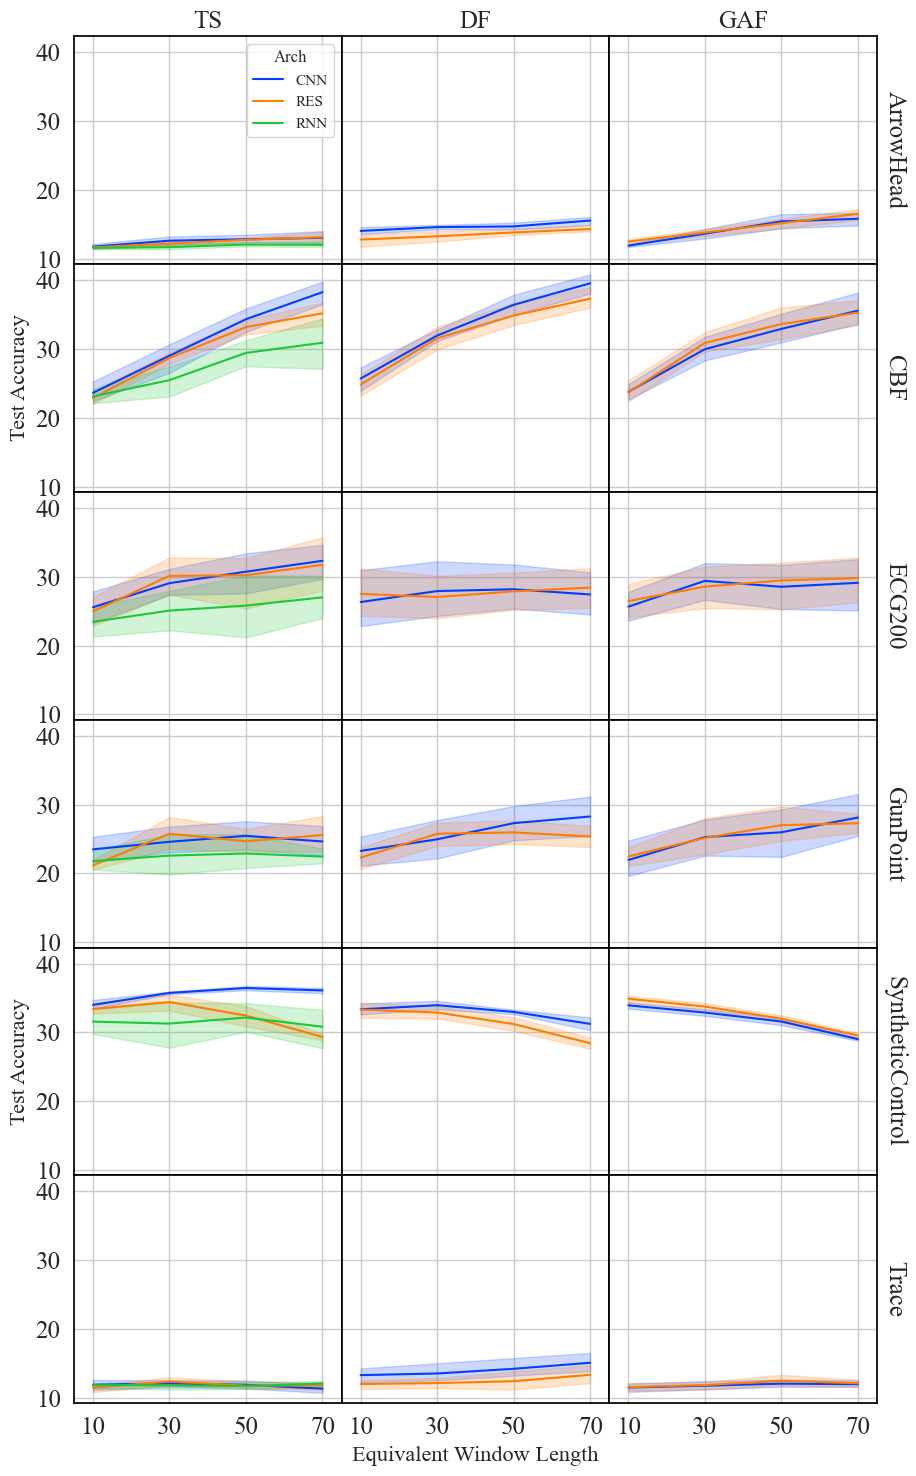

In [146]:
# Generate a plot
data["Method"] =  data["arch"] + "_" + data["mode"]
data.sort_values(["Method"], inplace=True)

data["arch"].replace(to_replace=["rnn", "cnn", "res"], value=["RNN", "CNN", "RES"], inplace=True)
data["mode"].replace(to_replace=["df", "gf", "ts"], value=["DF", "GAF", "TS"], inplace=True)
data["Arch"] = data["arch"]

fontsize = 18

sns.set_theme()
sns.set_style("whitegrid")
plt.rc('font', family='serif', serif='Times New Roman', size=fontsize)
plt.rc('xtick', labelsize='medium')
plt.rc('ytick', labelsize='medium')

g = sns.relplot(data=data, x="eq_wdw_length", y="test_auroc", hue='Arch', 
                kind="line", col="mode", row="dataset", palette=sns.color_palette("bright"),
                height=2.5, aspect=1.25, legend="auto", markers="True", 
                col_order=["TS", "DF", "GAF"], 
                row_order=["ArrowHead", "CBF", "ECG200", "GunPoint", "SyntheticControl", "Trace"],
                facet_kws={"despine": False, "margin_titles": True, "legend_out": False})
g.set_titles(col_template="{col_name}", row_template="{row_name}", size=fontsize)
g.set_xlabels("Equivalent Window Length", fontsize=fontsize-2);
g.set_ylabels("Test Accuracy", fontsize=fontsize-2);
g.set(xlim=(5, 75), xticks=[10, 30, 50, 70])
    #ylim=[25, 75], yticks=[30, 40, 50, 60, 70])
g.figure.subplots_adjust(wspace=0, hspace=0)

for (row_val, col_val), ax in g.axes_dict.items():
    if row_val not in ["CBF", "SyntheticControl"]:
        ax.set_ylabel("")
    if row_val == "Trace" and col_val not in ["DF"]:
        ax.set_xlabel("")
    for sp in ax.spines.values():
        sp.set_color("black")


g.savefig("figures/time_dilation.pdf", bbox_inches='tight')

# Self-Supervised Pretrain Effects

In [147]:
data = df[df["pretrain_mode"] == False].copy()

data = data[data["window_time_stride"] == 7]
data = data[data["window_patt_stride"] == 1]

data = data[data["arch"].isin(["cnn", "res"])]
data.sort_values(["dataset","arch"], inplace=True)

In [148]:
data[data["mode"] == "df"].groupby(["dataset", "mode", "arch", "pretrained", "stride_series", 'train_exc_limit'])[cols].mean()

test_acc  \
dataset          mode arch pretrained stride_series train_exc_limit             
ArrowHead        df   cnn  False      False         4.0              0.365050   
                                                    8.0              0.409149   
                                                    16.0             0.463108   
                                                    32.0             0.530858   
                           True       False         4.0              0.428705   
...                                                                       ...   
SyntheticControl df   res  True       True          8.0              0.294524   
                                                    16.0             0.380250   
                                                    32.0             0.465538   
Trace            df   cnn  False      False         32.0             0.625560   
                      res  False      False         32.0             0.613913   

                                                                      test_f1  \
dataset          mode arch pretrained stride_series train_exc_limit             
ArrowHead        df   cnn  False      False         4.0              0.365050   
                                                    8.0              0.409149   
                                                    16.0             0.463108   
                                                    32.0             0.530858   
                           True       False         4.0              0.428705   
...                                                                       ...   
SyntheticControl df   res  True       True          8.0              0.294524   
                                                    16.0             0.380250   
                                                    32.0             0.465538   
Trace            df   cnn  False      False         32.0             0.625560   
                      res  False      False         32.0             0.613913   

                                                                     test_auroc  \
dataset          mode arch pretrained stride_series train_exc_limit               
ArrowHead        df   cnn  False      False         4.0                0.136130   
                                                    8.0                0.126026   
                                                    16.0               0.143588   
                                                    32.0               0.155448   
                           True       False         4.0                0.146202   
...                                                                         ...   
SyntheticControl df   res  True       True          8.0                0.277317   
                                                    16.0               0.301433   
                                                    32.0               0.315165   
Trace            df   cnn  False      False         32.0               0.150910   
                      res  False      False         32.0               0.133416   

                                                                      val_acc  \
dataset          mode arch pretrained stride_series train_exc_limit             
ArrowHead        df   cnn  False      False         4.0              0.426253   
                                                    8.0              0.421179   
                                                    16.0             0.487165   
                                                    32.0             0.540327   
                           True       False         4.0              0.587241   
...                                                                       ...   
SyntheticControl df   res  True       True          8.0              0.313417   
                                                    16.0             0.387217   
                                                    32.0             0.

In [149]:
tab1 = data[data["train_exc_limit"] == 32].groupby(["mode", "arch", "pretrained", "stride_series", "dataset"])["test_auroc"].mean()
tab2 = data[data["train_exc_limit"] == 32].groupby(["mode", "arch", "pretrained", "stride_series", "dataset"])["test_auroc"].std()
tab = pd.merge(tab1, tab2, on=["mode", "arch", "pretrained", "stride_series", "dataset"]).rename(columns={"test_auroc_x": "mean", "test_auroc_y": "std"})
tab["mean"], tab["std"] = tab["mean"]*100, tab["std"]*100
tab.head(36)

mean       std
mode arch pretrained stride_series dataset                              
df   cnn  False      False         ArrowHead         15.544820  0.783782
                                   CBF               39.552712  1.752451
                                   ECG200            27.429294  4.019990
                                   GunPoint          28.272808  3.737693
                                   SyntheticControl  31.243320  1.117565
                                   Trace             15.091016  1.702902
          True       False         ArrowHead         16.461580  0.734088
                                   CBF               40.207942  1.618177
                                   ECG200            28.693670  3.690450
                                   GunPoint          28.923200  3.194277
                                   SyntheticControl  31.930827  0.802917
                     True          ArrowHead         16.460784  0.924861
                                   CBF               39.603037  1.653232
                                   ECG200            29.040729  4.556037
                                   GunPoint          29.543545  2.534839
                                   SyntheticControl  32.120047  0.574859
     res  False      False         ArrowHead         14.319725  0.603261
                                   CBF               37.314526  1.897238
                                   ECG200            28.423370  3.878970
                                   GunPoint          25.367244  2.091338
                                   SyntheticControl  28.428813  1.063200
                                   Trace             13.341602  1.643335
          True       False         ArrowHead         15.036958  0.784400
                                   CBF               38.740850  1.868728
                                   ECG200            28.894771  4.248716
                                   GunPoint          26.849621  2.621126
                                   SyntheticControl  31.040145  0.352787
                     True          ArrowHead         15.597082  0.889952
                                   CBF               38.147784  1.419416
                                   ECG200            29.157669  4.570098
                                   GunPoint          28.319757  2.489673
                                   SyntheticControl  31.516471  0.461024
gf   cnn  False      False         ArrowHead         15.801134  1.192387
                                   CBF               35.571803  2.730316
                                   ECG200            29.126933  4.751497
                                   GunPoint          28.118983  3.811791

In [150]:
tab.tail(36)

mean       std
mode arch pretrained stride_series dataset                              
df   res  True       True          CBF               38.147784  1.419416
                                   ECG200            29.157669  4.570098
                                   GunPoint          28.319757  2.489673
                                   SyntheticControl  31.516471  0.461024
gf   cnn  False      False         ArrowHead         15.801134  1.192387
                                   CBF               35.571803  2.730316
                                   ECG200            29.126933  4.751497
                                   GunPoint          28.118983  3.811791
                                   SyntheticControl  29.029021  0.303571
                                   Trace             11.977409  0.601287
          True       False         ArrowHead         16.410452  1.612070
                                   CBF               36.576387  2.266603
                                   ECG200            30.783789  4.261906
                                   GunPoint          31.429405  3.416523
                                   SyntheticControl  29.310411  0.396246
                     True          ArrowHead         16.629333  0.385443
                                   CBF               36.412448  2.264550
                                   ECG200            30.566214  4.678444
                                   GunPoint          29.474193  3.883255
                                   SyntheticControl  29.411012  0.273429
     res  False      False         ArrowHead         16.536463  1.083330
                                   CBF               35.289189  2.518007
                                   ECG200            29.809902  4.324996
                                   GunPoint          27.292699  1.792462
                                   SyntheticControl  29.553351  0.399774
                                   Trace             12.115753  0.627667
          True       False         ArrowHead         16.870160  0.722583
                                   CBF               36.470494  2.309059
                                   ECG200            30.319140  4.688638
                                   GunPoint          29.476945  2.826560
                                   SyntheticControl  29.554668  0.419503
                     True          ArrowHead         15.635641  0.993916
                                   CBF               35.924267  2.612429
                                   ECG200            30.253822  4.722210
                                   GunPoint          29.037445  2.348991
                                   SyntheticControl  29.536381  0.197391

In [151]:
# Scale the data to 0-100 range
data["test_acc"] = data["test_acc"]*100
data["test_auroc"] = data["test_auroc"]*100

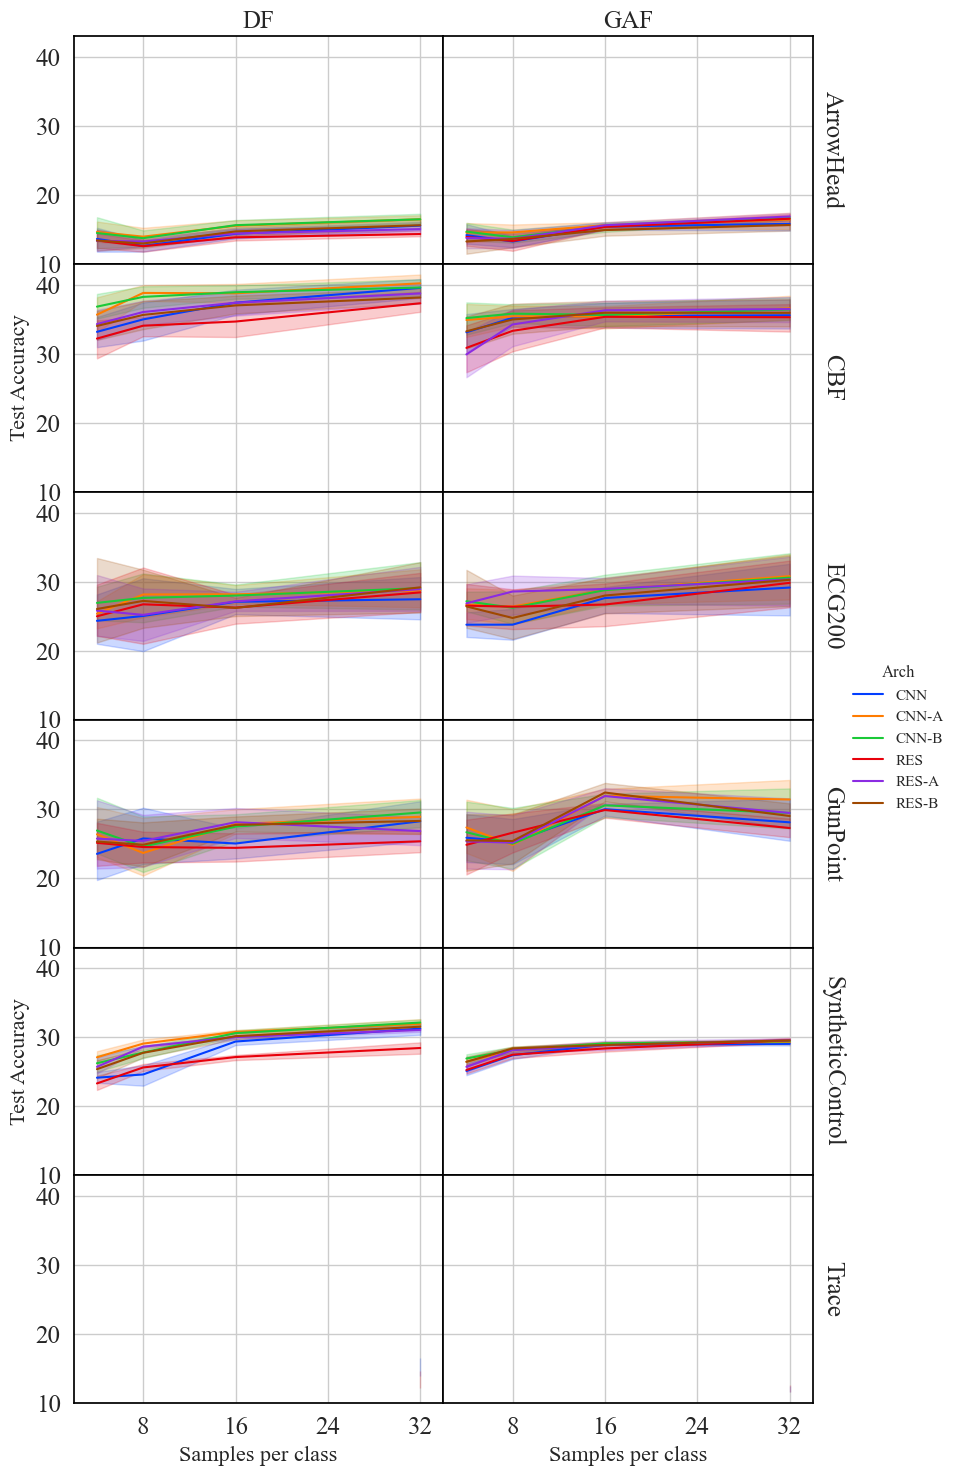

In [153]:
# Generate a plot

data["arch"].replace(to_replace=["cnn", "res"], value=["CNN", "RES"], inplace=True)
data["mode"].replace(to_replace=["df", "gf"], value=["DF", "GAF"], inplace=True)
data["Arch"] = data["arch"] + data["pretrained"].replace({True: "-", False: ""}) + data["stride_series"].replace({True: "B", False: "A"})
data["Arch"].replace({"CNNA": "CNN", "RESA": "RES"}, inplace=True)

fontsize = 18

sns.set_theme()
sns.set_style("whitegrid")
plt.rc('font', family='serif', serif='Times New Roman', size=fontsize)
plt.rc('xtick', labelsize='medium')
plt.rc('ytick', labelsize='medium')

g = sns.relplot(data=data, x="train_exc_limit", y="test_auroc", hue='Arch', 
                kind="line", col="mode", row="dataset", palette=sns.color_palette("bright"),
                height=2.5, aspect=1.75, legend="auto", markers="True", 
                col_order=["DF", "GAF"], 
                row_order=["ArrowHead", "CBF", "ECG200", "GunPoint", "SyntheticControl", "Trace"],
                facet_kws={"despine": False, "margin_titles": True, "legend_out": True})

g.set_titles(col_template="{col_name}", row_template="{row_name}", size=fontsize)
g.set_xlabels("Samples per class", fontsize=fontsize-2);
g.set_ylabels("Test Accuracy", fontsize=fontsize-2);
g.set(xlim=(2, 34), xticks=[8,16,24,32])
#    ylim=[15, 80], yticks=[20, 30, 40, 50, 60, 70])
g.figure.subplots_adjust(wspace=0, hspace=0)

for (row_val, col_val), ax in g.axes_dict.items():
    if row_val not in ["CBF", "SyntheticControl"]:
        ax.set_ylabel("")
    for sp in ax.spines.values():
        sp.set_color("black")

g.savefig("figures/pretrain.pdf", bbox_inches='tight')

# heatmap showing percent change over no pretraied model

In [18]:
dfg = data.groupby(["dataset", "mode", "arch", "pretrained", "stride_series", 'train_exc_limit'])[cols].mean().reset_index()

metric = "test_acc"

# archs = {arch: i for i, arch in enumerate(dfg["arch"].sort_values().unique())}
# dsets = {dset: i for i, dset in enumerate(dfg["dataset"].sort_values().unique())}
# modes = {mode: i for i, mode in enumerate(dfg["mode"].sort_values().unique())}
# samps = {samp: i for i, samp in enumerate(dfg["train_exc_limit"].sort_values().unique())}
# prets = {"A": 0, "B": 1}

dfd = pd.DataFrame(columns=["arch", "mode", "dataset", "train_exc_limit", "pret", metric])

for (dset, mode, arch, nsamp), g in dfg.groupby(["dataset", "mode", "arch", 'train_exc_limit']):
    
    g: pd.DataFrame

    if len(g) == 3:

        def_val = g[metric].iloc[0]
        pa_val = g[metric].iloc[1]
        pb_val = g[metric].iloc[2]

        dfd.loc[len(dfd)] = [arch, mode, dset, nsamp, "A", (pa_val - def_val)*100]
        dfd.loc[len(dfd)] = [arch, mode, dset, nsamp, "B", (pb_val - def_val)*100]
        
    else: 
        continue

dfd["arch_pret"] = dfd["arch"] + "_" + dfd["pret"]
dfd.sort_values(["arch_pret", "dataset", "train_exc_limit"], inplace=True)

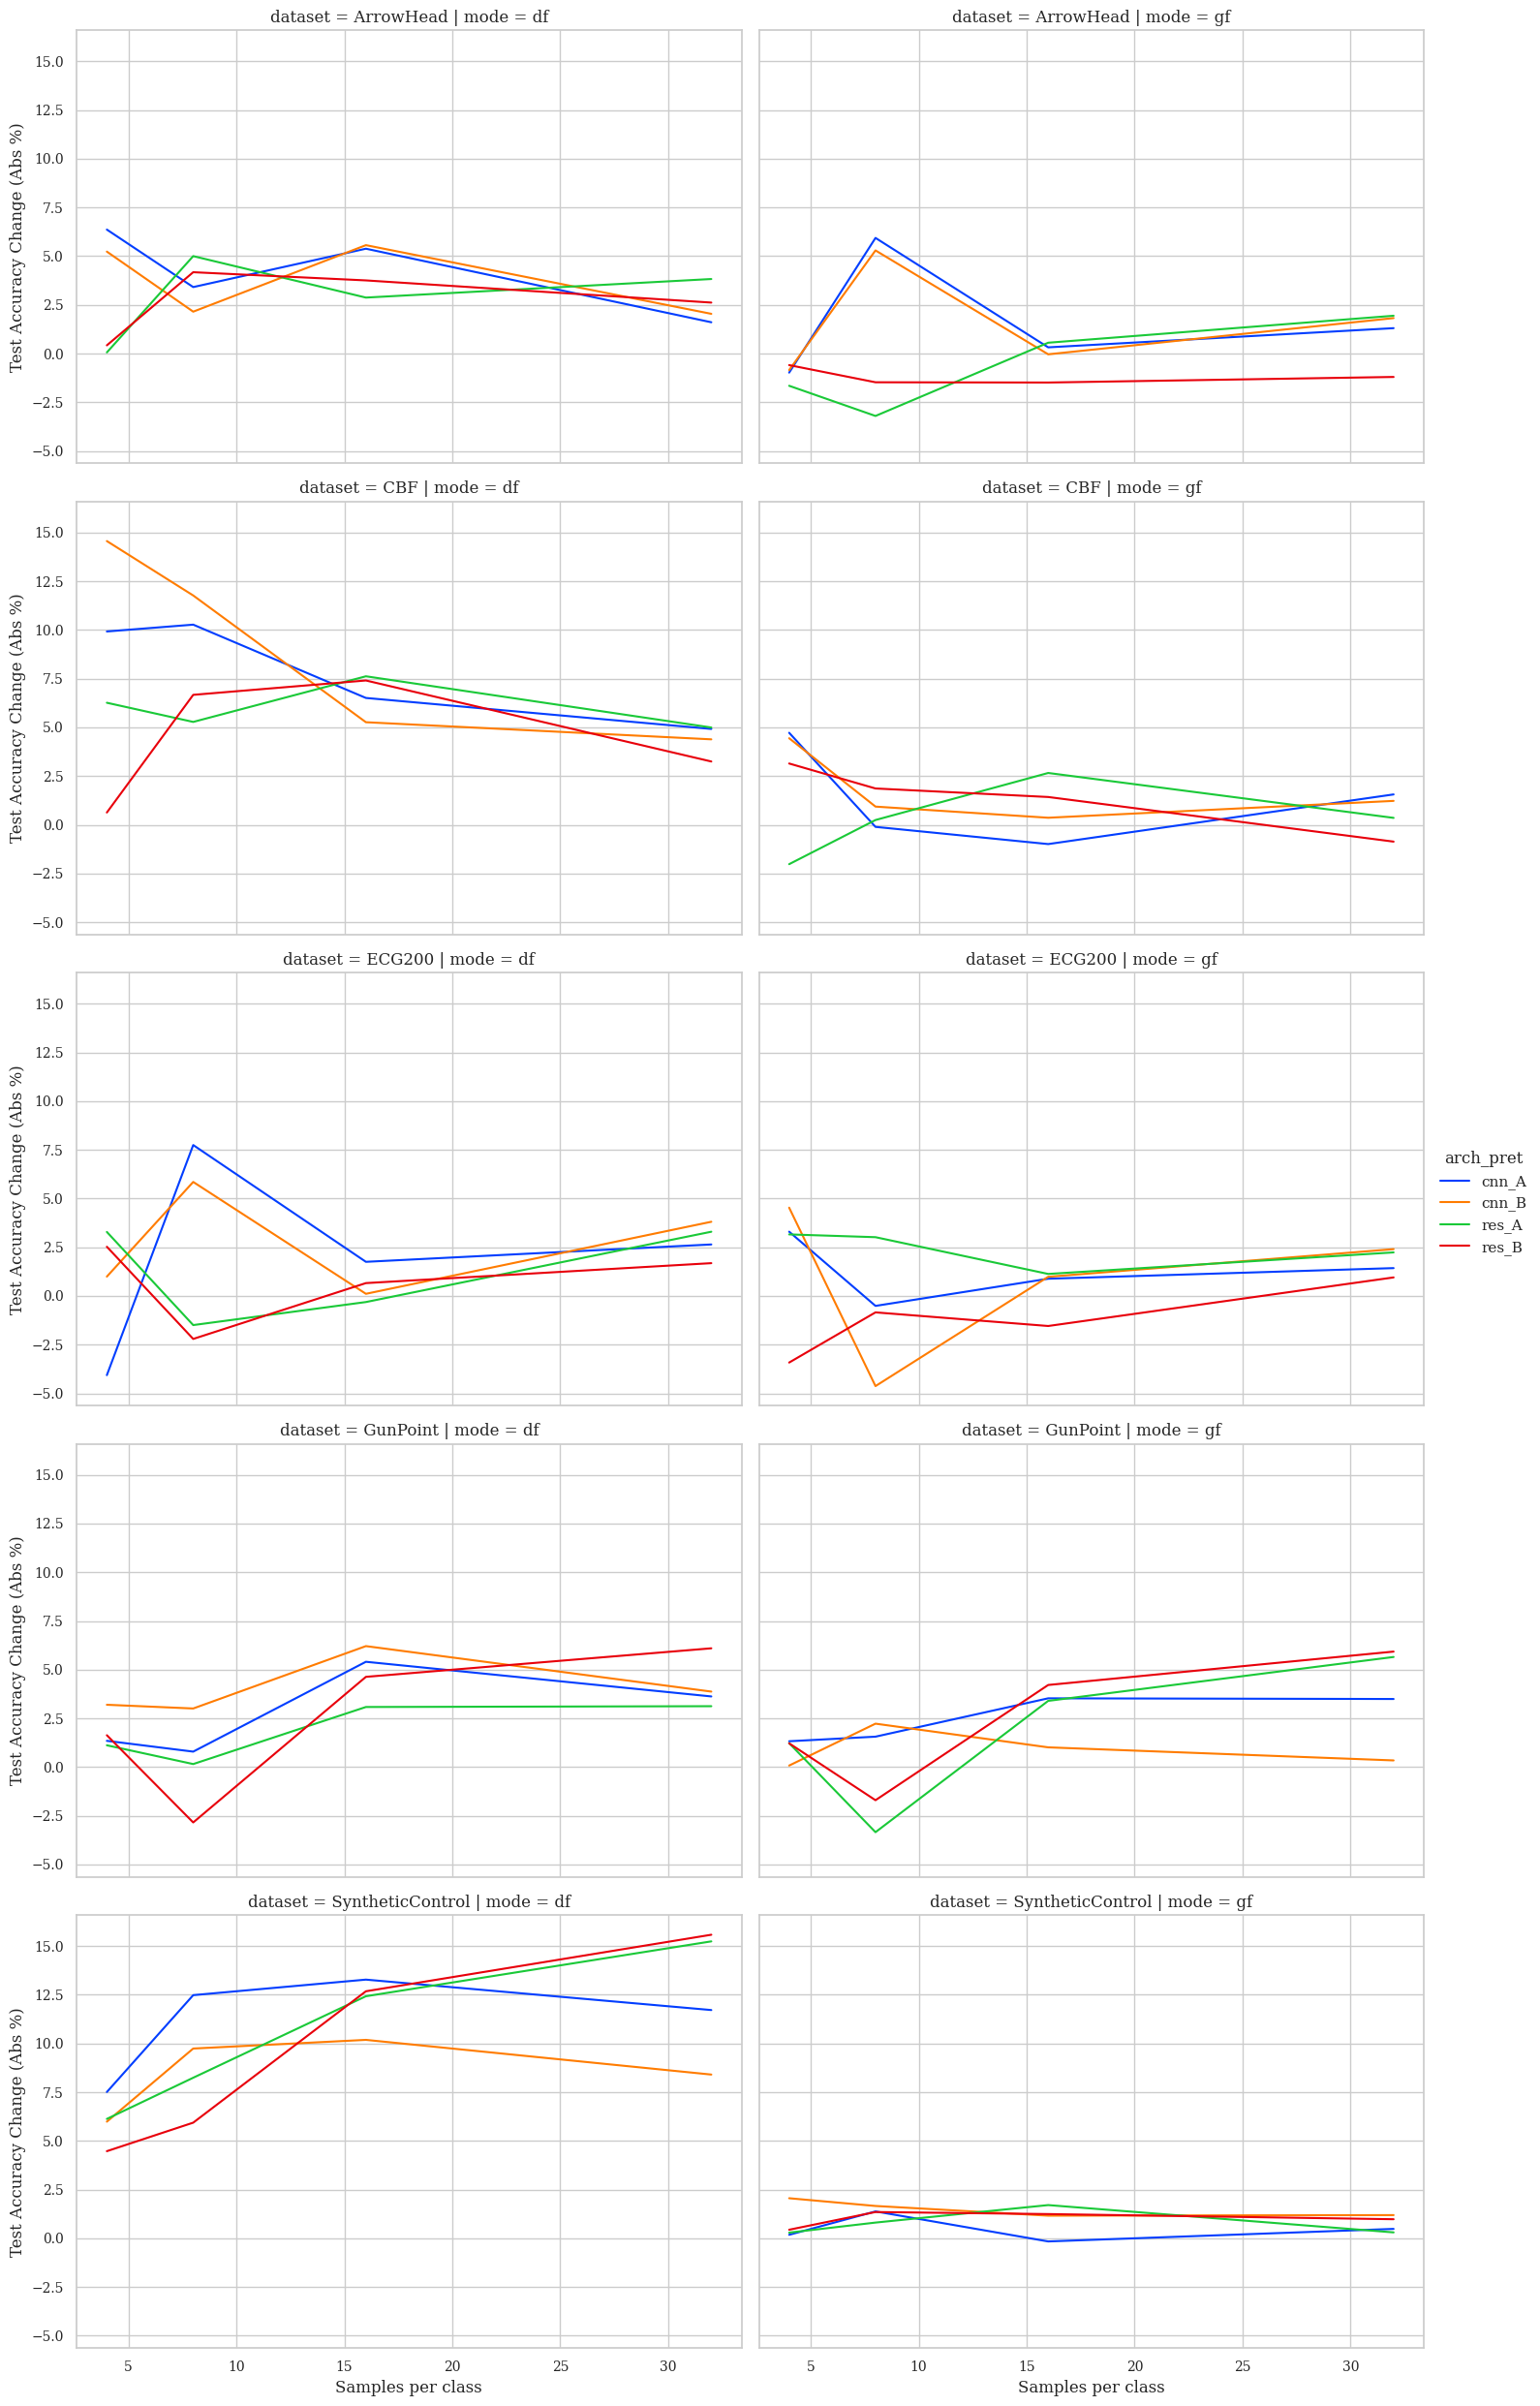

In [19]:
sns.set_theme()
sns.set_style("whitegrid")
plt.rc('font', family='serif')
plt.rc('xtick', labelsize='small')
plt.rc('ytick', labelsize='small')

g = sns.relplot(data=dfd, x="train_exc_limit", y=metric, hue='arch_pret', kind="line", palette="bright", col="mode", row="dataset", 
            height=5, aspect=1.5, legend=True, facet_kws={"despine": False})

g.set_ylabels("Test Accuracy Change (Abs %)")
g.set_xlabels("Samples per class");

g.savefig("figures/pret_change.pdf", bbox_inches='tight')


# DF vs GF figure

In [20]:
from s3ts.data.acquisition import download_dataset
from s3ts.data.setup import train_test_splits
from s3ts.data.setup import setup_train_dm 
from pathlib import Path

# dataset settings
dataset         = "Trace"
storage_dir     = Path("storage")
cv_rep          = 0
exc             = 32
random_state    = 0
rho_dfs         = 0.1

X, Y, medoids, medoid_idx = download_dataset(dataset=dataset, storage_dir=storage_dir)
for j, (train_idx, test_idx) in enumerate(train_test_splits(X, Y, exc=exc, nreps=cv_rep+1, random_state=random_state)):
            if j == cv_rep:
                break

print(X.shape)

# sts settings
train_strat_size = 2
train_event_mult = 4
test_sts_length = 200
train_event_limit = exc
batch_size = 128

dm_df = setup_train_dm(X=X, Y=Y, patterns=medoids, train_idx=train_idx, test_idx=test_idx,
    test_sts_length=200, train_event_mult=4, train_strat_size=2, train_event_limit=exc,
    batch_size=128, val_size=0.25, rho_dfs=rho_dfs, window_length=10, mode="df", num_workers=4,
    window_time_stride=7, window_patt_stride=1,stride_series=False, random_state=random_state)

dm_gf = setup_train_dm(X=X, Y=Y, patterns=medoids, train_idx=train_idx, test_idx=test_idx,
    test_sts_length=200, train_event_mult=4, train_strat_size=2, train_event_limit=exc,
    batch_size=128, val_size=0.25, rho_dfs=rho_dfs, window_length=10, mode="gf", num_workers=4,
    window_time_stride=7, window_patt_stride=1,stride_series=False, random_state=random_state)

/home/raul/code/s3ts/s3ts_env/lib/python3.11/site-packages/sktime/__init__.py:45: PackageDeprecationWarning: 
The sktime PyPI package is deprecated.
The sktime project split into two projects.

To find out how to install the new packages, please go to:

* https://github.com/aeon-toolkit/aeon
* https://github.com/sktime/sktime

Here is what you can do when installing sktime via pip (e.g. using `pip install ...` or a requirement file like `requirements.txt`, `setup.py`, `setup.cfg`):

* continue using the package without receiving any updates (ignoring the deprecation warning or avoiding it by pinning the version: `sktime==0.18.0`),
* replace sktime with one of the new projects,
* if the sktime package is used by one of your dependencies, it would be great if you take some time to track which package uses sktime and report to their issue tracker that sktime is deprecated.

More information is available at:
https://github.com/mloning/sktime-deprecation/discussions/2

If the previous advic

(100, 275)


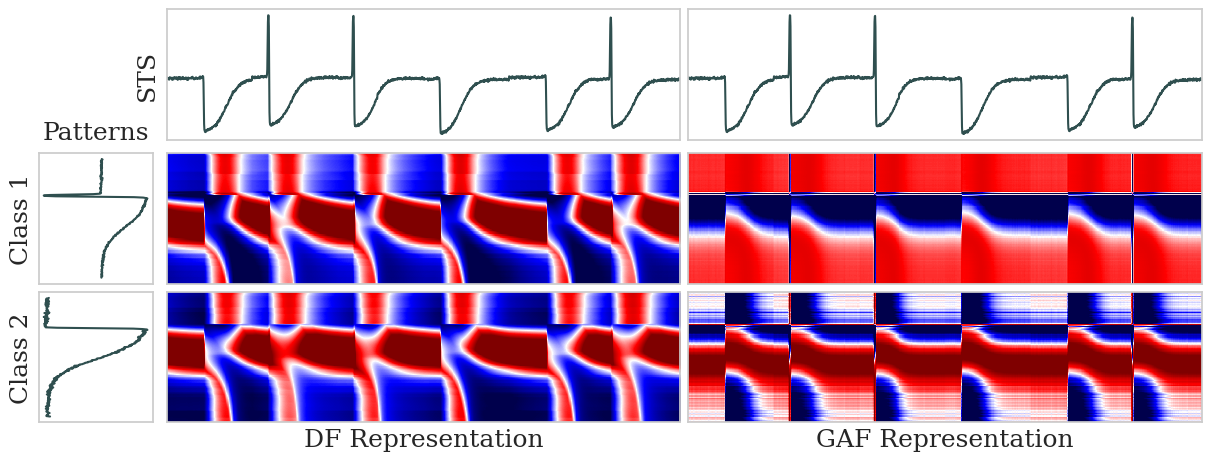

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# plot settings
shift, n_frames = 0, 6
vmin, vmax = -2.5, 2.5
print_lines = False
fontsize = 18
ts_color = "darkslategray"
cmaps = ["seismic", "seismic"]

plt.rc('font', family='serif')
plt.rc('xtick', labelsize='small')
plt.rc('ytick', labelsize='small')


n_patterns = dm_df.n_patterns
sts_range = (dm_df.l_events*shift, dm_df.l_events*shift + dm_df.l_events*n_frames)

patts = dm_df.patterns.numpy()
TS = dm_df.STS_train[sts_range[0]:sts_range[1]]
DF = dm_df.DM_train[:,:,sts_range[0]:sts_range[1]]
GF = dm_gf.DM_train[:,:,sts_range[0]:sts_range[1]]

fig = plt.figure(figsize=(12, 1.5+n_patterns*1.5), dpi=100, layout="constrained")
gs = fig.add_gridspec(nrows=n_patterns+1, ncols=3,
        hspace=0, height_ratios=None,
        wspace=0, width_ratios=[0.1, 0.45, 0.45])


vlines = np.where(np.mod(np.arange(sts_range[0], sts_range[1]), dm_df.l_events) == 0)[0]

corner = fig.add_subplot(gs[0,0])
corner.set_xticklabels([]), corner.set_yticklabels([])
corner.set_xticks([]), corner.set_yticks([])
corner.text(0.95, 0.5, "STS", fontsize=fontsize, rotation=90, ha="center", va="center")
corner.text(0.5, 0.05, "Patterns", fontsize=fontsize, ha="center", va="center")
corner.spines['top'].set_visible(False)
corner.spines['right'].set_visible(False)
corner.spines['bottom'].set_visible(False)
corner.spines['left'].set_visible(False)


sts_ax1 = fig.add_subplot(gs[0,1])
sts_ax1.plot(np.arange(sts_range[0], sts_range[1]), TS, color=ts_color)
sts_ax1.set_xlim(sts_range[0], sts_range[1]-1)
sts_ax1.set_xticklabels([]), sts_ax1.set_yticklabels([])
sts_ax1.set_xticks([]), sts_ax1.set_yticks([])
if print_lines:
        [sts_ax1.axvline(x + sts_range[0], color="dimgray", linewidth=0.5) for x in vlines]
sts_ax1.grid(True)


sts_ax2 = fig.add_subplot(gs[0,2])
sts_ax2.plot(np.arange(sts_range[0], sts_range[1]), TS, color=ts_color)
sts_ax2.set_xlim(sts_range[0], sts_range[1]-1)
sts_ax2.set_xticklabels([]), sts_ax2.set_yticklabels([])
sts_ax2.set_xticks([]), sts_ax2.set_yticks([])
if print_lines:
        [sts_ax2.axvline(x + sts_range[0], color="dimgray", linewidth=0.5) for x in vlines]
sts_ax1.grid(True)


for p in range(n_patterns):

        # patt plot
        patt_ax = fig.add_subplot(gs[p+1,0])
        patt_ax.plot(patts[p,::-1], np.arange(len(patts[0])), color=ts_color)
        patt_ax.set_yticklabels([]), patt_ax.set_xticklabels([])
        patt_ax.set_yticks([]), patt_ax.set_xticks([])
        patt_ax.invert_xaxis(), patt_ax.grid(True)

        # # image plot
        # im_ax = fig.add_subplot(gs[p+1,1])     
        # gf = GF[p,:,sts_range[0]:sts_range[1]-(sts_range[1]-sts_range[0])//2]   
        # df = DF[p,:,sts_range[1]-(sts_range[1]-sts_range[0])//2:sts_range[1]]
        # gf = 2*(gf-gf.mean())/gf.std()
        # df = 2*(df-df.mean())/df.std()
        # im = np.concatenate([gf, df], axis=1)
        # im_ax.imshow(im, aspect="auto", cmap="seismic", vmin=-2, vmax=2)
        # im_ax.set_yticklabels([]), im_ax.set_xticklabels([])
        # im_ax.set_xticks([]), im_ax.set_yticks([])
        
        #[im_ax.axvline(x, color="white") for x in vlines]

        # df plot
        df_ax = fig.add_subplot(gs[p+1,1])        
        df_im = DF[p,:,sts_range[0]:sts_range[1]]
        df_im = 2*(df_im-df_im.mean())/df_im.std()
        df_ax.imshow(df_im, aspect="auto", cmap=cmaps[0], vmin=vmin, vmax=vmax)
        df_ax.set_yticklabels([]), df_ax.set_xticklabels([])
        df_ax.set_xticks([]), df_ax.set_yticks([])
        #df_vlines = np.where(np.mod(np.arange(sts_range[0], sts_range[1]-(sts_range[1]-sts_range[0])//2), dm_df.l_events) == 0)[0]
        #[df_ax.axvline(x, color="dimgray") for x in df_vlines]

        # gf plot
        gf_ax = fig.add_subplot(gs[p+1,2])
        gf_im = GF[p,:,sts_range[0]:sts_range[1]]
        gf_im = 2*(gf_im-gf_im.mean())/gf_im.std()
        gf_ax.imshow(gf_im, aspect="auto", cmap=cmaps[1], vmin=vmin, vmax=vmax)
        gf_ax.set_yticklabels([]), gf_ax.set_xticklabels([])
        gf_ax.set_xticks([]), gf_ax.set_yticks([])
        #gf_vlines = np.where(np.mod(np.arange(sts_range[1]-(sts_range[1]-sts_range[0])//2, sts_range[1]), dm_df.l_events) == 0)[0]
        #[gf_ax.axvline(x, color="dimgray") for x in gf_vlines]

        patt_ax.set_ylabel("Class {}".format(p+1), fontsize=fontsize)

        if p == n_patterns-1:
                df_ax.set_xlabel("DF Representation", fontsize=fontsize)
                gf_ax.set_xlabel("GAF Representation", fontsize=fontsize)

plt.savefig(f"figures/df_gf_{dataset}.pdf", bbox_inches="tight")